NLP PROJECT


In [1]:
%pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------

In [3]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.Collecting spacy
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 599.9 kB/s eta 0:00:20
   -- ------------------------------------- 0.8/12.2 MB 633.2 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/12.2 MB 633.2 kB/s eta 0:00:19
   --- ------------------------------------ 1.0/12.2 MB 637.3 kB/s eta 0:00:18
   --- ------------------------------------ 1.0/12.2 MB 637.3 kB/s eta 0:00:18
   ---- ----------------------------------- 1.3/12.2 MB 657.8 kB/s eta 0:00:17
   ----- ---------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
import camel_tools.utils.dediac as dediac 

# Download necessary Arabic resources
nltk.download('punkt')
nltk.download('stopwords')

# Arabic Tokenization
text = "دا مثال بالمصري اما نشوف هيعرف يعمله ولا لا."

# Sentence Tokenization
sentences = sent_tokenize(text)  

# Word Tokenization
words = word_tokenize(text)  

# Removing Diacritics (for better processing)
clean_text = dediac.dediac_ar(text)

# Stemming (Arabic ISRI Stemmer)
stemmer = ISRIStemmer()
stems = [stemmer.stem(word) for word in words]

# Stopword Removal
stop_words = set(stopwords.words('arabic'))
filtered_words = [word for word in words if word not in stop_words]

# Print Results
print("Tokenized Sentences:", sentences)
print("Tokenized Words:", words)
print("Cleaned Text (No Diacritics):", clean_text)
print("Stemmed Words:", stems)
print("Filtered Words (No Stopwords):", filtered_words)


ModuleNotFoundError: No module named 'spacy'

In [3]:
import nltk
from nltk.corpus import stopwords

# Download Arabic stopwords
nltk.download('stopwords')

# Load Standard Arabic Stopwords
msa_stopwords = set(stopwords.words('arabic'))

# Custom Egyptian Arabic Stopwords
egyptian_dialect_stopwords = {
    "ايه", "ليه", "اه", "مش", "انا", "انت", "احنا", "انتو", "هو", "هي",
    "طب", "كدة", "كده", "عايز", "عاوزه", "يعني", "بص", "ماشي", "خالص", "بالظبط",
    "اوو", "تمام", "اصلا", "اصلي", "اوكي", "اوك", "برضه", "اهو", "اها", "بقى", "خلاص",
    "ده", "دي", "دول", "حاجة", "حاجه", "حاجات", "واحد", "اثنين", "تلاتة", "اربعة"
}

# Combine MSA and Egyptian Arabic stopwords
combined_stopwords = msa_stopwords.union(egyptian_dialect_stopwords)

# Example Text (Egyptian Arabic)
text = "انا عايز اشتري حاجة بس مش عارف اختار ايه."

# Tokenization (Simple Split for Example)
words = text.split()

# Removing Stopwords
filtered_words = [word for word in words if word not in combined_stopwords]

print("Filtered Words:", filtered_words)


Filtered Words: ['اشتري', 'عارف', 'اختار', 'ايه.']


[nltk_data] Downloading package stopwords to C:\Users\Byte
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import os
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Download required NLTK resources
nltk.download('punkt')

# Define dataset path
dataset_path = "../data"

# Store statistics
num_podcasts = 0
num_episodes = 0
total_words = 0
word_counts = []
sentence_lengths = []
all_words = []

[nltk_data] Downloading package punkt to C:\Users\Byte
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Byte Store\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
# Iterate through podcast folders
for podcast_folder in os.listdir(dataset_path):
    podcast_path = os.path.join(dataset_path, podcast_folder, "raw_transcripts")  # Go to raw_transcripts/

    if os.path.isdir(podcast_path):  # Ensure it's a valid folder
        num_podcasts += 1
        print(f"\n📢 Processing Podcast: {podcast_folder}")

        for episode_file in os.listdir(podcast_path):
            if episode_file.endswith(".txt"):
                episode_path = os.path.join(podcast_path, episode_file)

                # Read the episode transcript
                with open(episode_path, "r", encoding="utf-8") as file:
                    text = file.read()

                # Tokenize words and sentences
                words = nltk.word_tokenize(text)
                sentences = nltk.sent_tokenize(text)

                # Update statistics
                num_episodes += 1
                total_words += len(words)
                word_counts.append(len(words))
                sentence_lengths.extend([len(nltk.word_tokenize(sent)) for sent in sentences])
                all_words.extend(words)




📢 Processing Podcast: FoodCast

📢 Processing Podcast: أول مرة

📢 Processing Podcast: إيه المشكلة

📢 Processing Podcast: البشمهندس

📢 Processing Podcast: كاروهات

📢 Processing Podcast: من غير مونتاج


In [17]:
# **1️⃣ Dataset Overview**
print("\n📊 Dataset Overview:")
print(f"📌 Total Podcasts: {num_podcasts}")
print(f"📌 Total Episodes: {num_episodes}")
print(f"📌 Total Words: {total_words}")
print(f"📌 Avg Words per Episode: {round(total_words / num_episodes, 2)}")




📊 Dataset Overview:
📌 Total Podcasts: 6
📌 Total Episodes: 135
📌 Total Words: 826420
📌 Avg Words per Episode: 6121.63


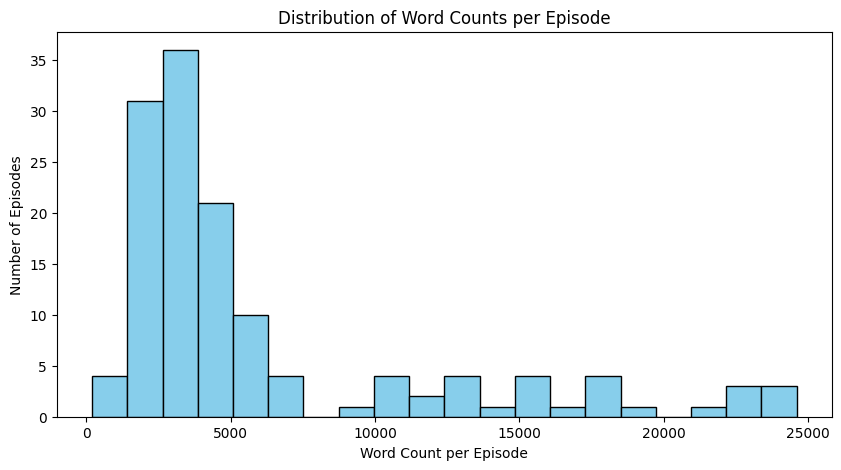

In [18]:
# **2️⃣ Text Length Analysis**
plt.figure(figsize=(10, 5))
plt.hist(word_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Word Count per Episode")
plt.ylabel("Number of Episodes")
plt.title("Distribution of Word Counts per Episode")
plt.show()



In [21]:
# Store word counts
podcast_word_counts = {}

# Iterate through podcast folders
for podcast_folder in os.listdir(dataset_path):
    podcast_path = os.path.join(dataset_path, podcast_folder, "raw_transcripts")  # Go to raw_transcripts/

    if os.path.isdir(podcast_path):  # Ensure it's a valid folder
        podcast_word_counts[podcast_folder] = []  # Create a list to store episode word counts

        for episode_file in os.listdir(podcast_path):
            # Process only `.txt` transcripts, ignore `.json`
            if episode_file.endswith(".txt"):
                episode_path = os.path.join(podcast_path, episode_file)

                # Read the episode transcript
                with open(episode_path, "r", encoding="utf-8") as file:
                    text = file.read()

                # Tokenize words
                words = nltk.word_tokenize(text)

                # Store episode word count
                podcast_word_counts[podcast_folder].append((episode_file, len(words)))

# **1️⃣ Print Word Counts in Structured Format**
for podcast, episodes in podcast_word_counts.items():
    print(f"\n🎙️ Podcast: {podcast}")
    for episode_name, word_count in episodes:
        print(f"  - 📜 {episode_name}: {word_count} words")


🎙️ Podcast: FoodCast
  - 📜 ازاي تفتح مطعم ؟ - من هو الشيف محمد صلاح ملاك اللحمة ؟ - Foodcast 5.txt: 24614 words
  - 📜 خسر في ٥ مطاعم وبدا من الصفر قبل نجاح مطعم ( Maine ماين ) - Foodcast 15.txt: 16743 words
  - 📜 خسرو اكثر من ٤ مليون و للاسباب ديه اوعى تفتح مطعم - Foodcast 17.txt: 19398 words
  - 📜 دكتور اسنان الصبح و فوودبلوجر بليل مع عمرو الهادي - Foodcast 7.txt: 23675 words
  - 📜 رحلة منعش لاكتشاف نفسه من دكتور اسنان الى مصور الى يوتيوبر - Foodcast 10.txt: 21498 words
  - 📜 قصة حلم عمر عربي و نجاحه الرهيب في فيديوهات الطبخ - Foodcast 4.txt: 17393 words
  - 📜 قصة مطعم المحمدي الذي يقوده دكتور جراح - Foodcast 14.txt: 14026 words
  - 📜 قصة مطعم زين الشام - من اقوي مطاعم الشاورما في مصر- Foodcast 16.txt: 12713 words
  - 📜 قصة نجاح احسن مطعم شاورما مصري في مصر - Foodcast 3.txt: 22895 words
  - 📜 كواليس رحلة و أكل اليابان الحلال - Foodcast 6.txt: 14955 words
  - 📜 لیه الدایت بیبوظ - خسر کل فلوسه فی مطعم - کریم امساعیل - Foodcast 2.txt: 24412 words
  - 📜 ما لا تعرفه عن عمرو شريف و كواليس 

In [19]:
# **3️⃣ Most Frequent Words (Before Stopword Removal)**
word_freq = Counter(all_words)
print("\n🔝 Top 20 Most Frequent Words:")
print(word_freq.most_common(20))


🔝 Top 20 Most Frequent Words:
[('.', 47812), ('في', 20647), ('أنا', 16229), ('يعني', 11695), ('إللي', 10992), ('ده', 9966), ('مش', 9836), ('من', 9518), ('إن', 9220), ('هو', 9190), ('ما', 8318), ('على', 7192), ('بس', 7095), ('إنت', 7012), ('ال', 6431), ('دي', 6106), ('كده', 5275), ('بقى', 4973), ('حاجة', 4941), ('إيه', 4561)]


In [20]:
# **4️⃣ Unique Word Count (Vocabulary Richness)**
unique_words = set(all_words)
print(f"\n🔠 Unique Words in Dataset: {len(unique_words)}")



🔠 Unique Words in Dataset: 81597


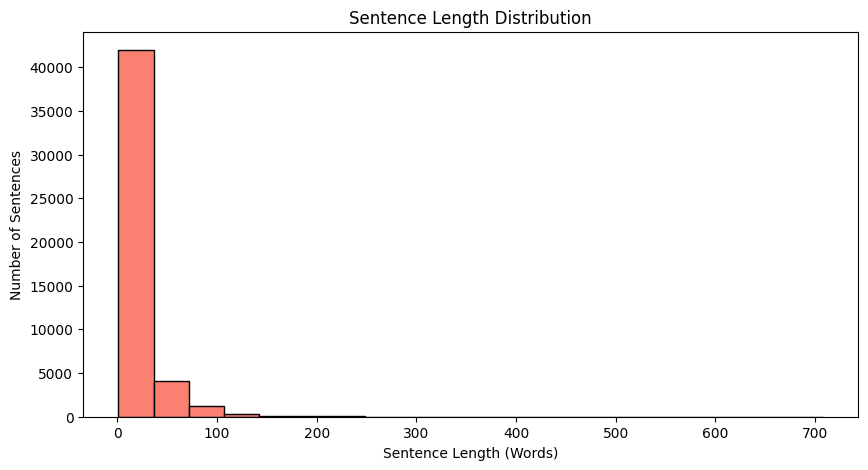

In [22]:

# **5️⃣ Sentence Length Distribution**
plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=20, color='salmon', edgecolor='black')
plt.xlabel("Sentence Length (Words)")
plt.ylabel("Number of Sentences")
plt.title("Sentence Length Distribution")
plt.show()

[nltk_data] Downloading package punkt to C:\Users\Byte
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



📢 Processing Podcast: FoodCast

📢 Processing Podcast: أول مرة

📢 Processing Podcast: إيه المشكلة

📢 Processing Podcast: البشمهندس

📢 Processing Podcast: كاروهات

📢 Processing Podcast: من غير مونتاج

📊 Average Sentence Length Per Podcast:
🎙️ FoodCast: 14.05 words per sentence
🎙️ أول مرة: 20.54 words per sentence
🎙️ إيه المشكلة: 13.57 words per sentence
🎙️ البشمهندس: 26.99 words per sentence
🎙️ كاروهات: 23.33 words per sentence
🎙️ من غير مونتاج: 37.81 words per sentence


C:\Users\Byte Store\AppData\Local\Temp\ipykernel_10980\169680362.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(podcast_sentence_lengths.values(), labels=podcast_sentence_lengths.keys(), patch_artist=True)


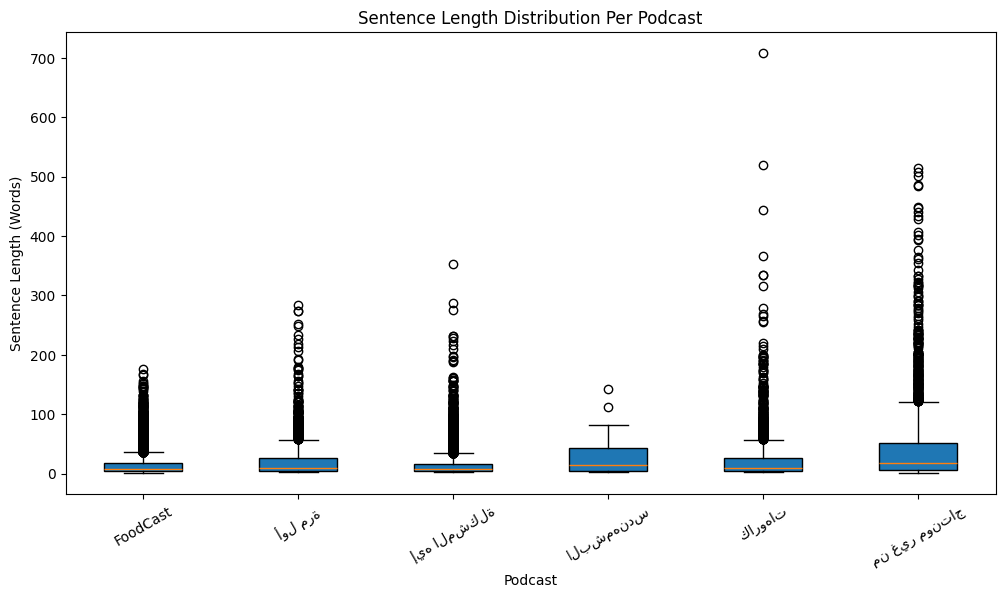

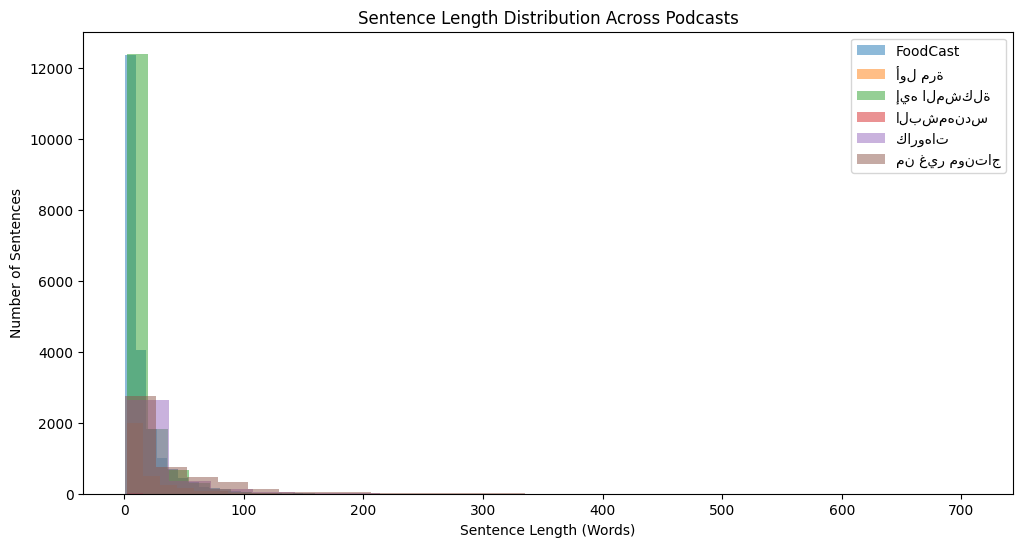

In [23]:
import os
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Download required NLTK resources
nltk.download('punkt')

# Define dataset path (Move up one level from `src/`)
dataset_path = "../data"

# Store sentence lengths for each podcast
podcast_sentence_lengths = defaultdict(list)

# Iterate through podcast folders
for podcast_folder in os.listdir(dataset_path):
    podcast_path = os.path.join(dataset_path, podcast_folder, "raw_transcripts")  # Go to raw_transcripts/

    if os.path.isdir(podcast_path):  # Ensure it's a valid folder
        print(f"\n📢 Processing Podcast: {podcast_folder}")

        for episode_file in os.listdir(podcast_path):
            if episode_file.endswith(".txt"):  # Process only transcripts, ignore metadata
                episode_path = os.path.join(podcast_path, episode_file)

                # Read the episode transcript
                with open(episode_path, "r", encoding="utf-8") as file:
                    text = file.read()

                # Tokenize sentences and calculate sentence lengths
                sentences = nltk.sent_tokenize(text)
                sentence_lengths = [len(nltk.word_tokenize(sent)) for sent in sentences]

                # Store sentence lengths for this podcast
                podcast_sentence_lengths[podcast_folder].extend(sentence_lengths)

# **1️⃣ Print Average Sentence Length Per Podcast**
print("\n📊 Average Sentence Length Per Podcast:")
for podcast, lengths in podcast_sentence_lengths.items():
    avg_length = round(np.mean(lengths), 2)
    print(f"🎙️ {podcast}: {avg_length} words per sentence")

# **2️⃣ Visualizing Sentence Lengths for Each Podcast (Box Plot)**
plt.figure(figsize=(12, 6))
plt.boxplot(podcast_sentence_lengths.values(), labels=podcast_sentence_lengths.keys(), patch_artist=True)
plt.xlabel("Podcast")
plt.ylabel("Sentence Length (Words)")
plt.title("Sentence Length Distribution Per Podcast")
plt.xticks(rotation=30)  # Rotate x-axis labels for readability
plt.show()

# **3️⃣ Sentence Length Histogram for Each Podcast**
plt.figure(figsize=(12, 6))
for podcast, lengths in podcast_sentence_lengths.items():
    plt.hist(lengths, bins=20, alpha=0.5, label=podcast)

plt.xlabel("Sentence Length (Words)")
plt.ylabel("Number of Sentences")
plt.title("Sentence Length Distribution Across Podcasts")
plt.legend()
plt.show()


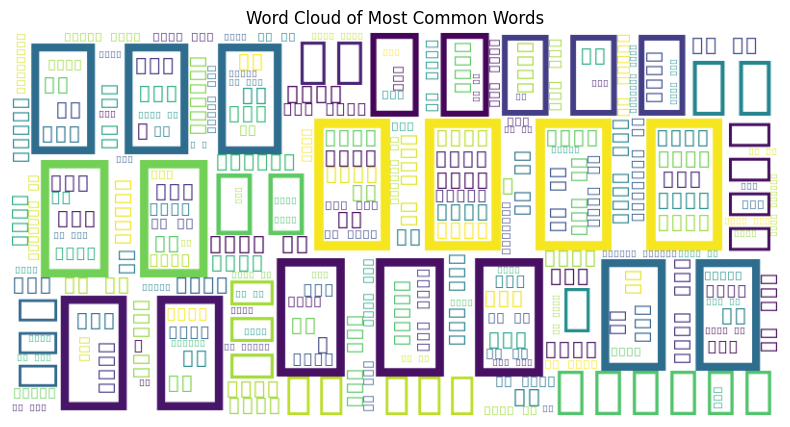

In [24]:

# **6️⃣ Word Cloud (Most Common Words)**
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Words")
plt.show()

[nltk_data] Downloading package punkt to C:\Users\Byte
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


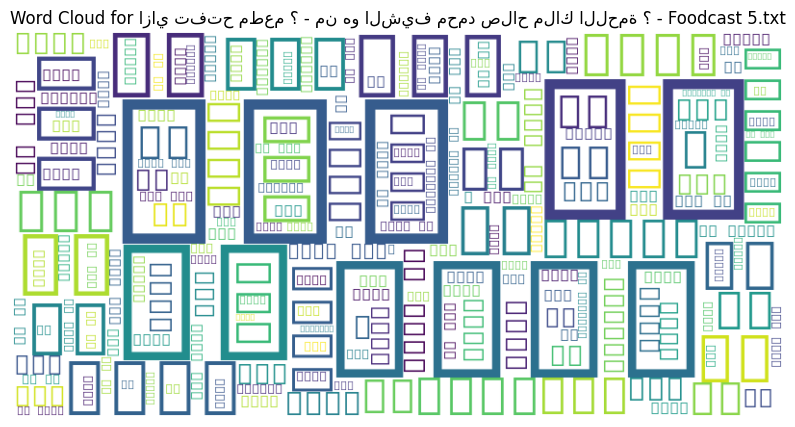

In [25]:
import os
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary resources
nltk.download('punkt')

# Define dataset path (Move up one level from `src/`)
dataset_path = "../data"

# **1️⃣ Select a Specific Podcast and Episode**
podcast_name = "FoodCast"  # Change to any podcast name
episode_name = "ازاي تفتح مطعم ؟ - من هو الشيف محمد صلاح ملاك اللحمة ؟ - Foodcast 5.txt"  # Change to any episode file

# **2️⃣ Construct Full Path to the Episode**
episode_path = os.path.join(dataset_path, podcast_name, "raw_transcripts", episode_name)

# **3️⃣ Check if File Exists**
if not os.path.exists(episode_path):
    print(f"❌ Error: The file {episode_name} does not exist in {podcast_name}/raw_transcripts/")
else:
    # **4️⃣ Read the Episode Transcript**
    with open(episode_path, "r", encoding="utf-8") as file:
        text = file.read()

    # **5️⃣ Tokenize Words**
    words = nltk.word_tokenize(text)

    # **6️⃣ Generate and Display Word Cloud**
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {episode_name}")
    plt.show()


In [4]:
from collections import Counter

# Example dataset (list of sentences)
dataset = [
    "انا عايز اشتري حاجة جديدة.",
    "ايه رايك في الموبايل ده؟",
    "مش عارف اعمل ايه.",
    "طب تمام، ماشي."
]

# Tokenize and count words
word_counts = Counter(" ".join(dataset).split())

# Print the most common words
print(word_counts.most_common(20))  # Manually filter frequent unimportant words


[('انا', 1), ('عايز', 1), ('اشتري', 1), ('حاجة', 1), ('جديدة.', 1), ('ايه', 1), ('رايك', 1), ('في', 1), ('الموبايل', 1), ('ده؟', 1), ('مش', 1), ('عارف', 1), ('اعمل', 1), ('ايه.', 1), ('طب', 1), ('تمام،', 1), ('ماشي.', 1)]


`Time stamp calculation`

In [7]:
import os
import re

# Define the folder path where transcripts are stored
FOLDER_PATH = r"F:\SEMESTER10\NLP\project\NLP-Project\data\إيه المشكلة\raw_transcripts"

# Function to extract the last timestamp from a transcript
def extract_last_timestamp(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Regex to find timestamps (MM:SS or HH:MM:SS formats)
        timestamp_pattern = r'\s*(\d{1,2}:\d{2}(?::\d{2})?)\s*\n(.+?)(?=\n\s*\d{1,2}:\d{2}|$)'
        matches = re.findall(timestamp_pattern, text, re.DOTALL)

        if matches:
            last_timestamp = matches[-1][0]
            return last_timestamp
        else:
            return "No timestamps found"

    except Exception as e:
        return f"Error reading file: {e}"

# Iterate through all text files in the folder
for filename in os.listdir(FOLDER_PATH):
    if filename.endswith(".txt"):  # Process only .txt files
        file_path = os.path.join(FOLDER_PATH, filename)
        podcast_length = extract_last_timestamp(file_path)
        print(f"📁 File: {filename} | ⏱️ Podcast Length: {podcast_length}")


📁 File: Ep.16 –إيه المشكلة لو مش بنصوم رمضان وليه هو مهم كده ؟.txt | ⏱️ Podcast Length: 2:24:52
📁 File: Ep.17 –إيه المشكلة في المصيف والساحل والرحلات؟.txt | ⏱️ Podcast Length: 1:50:22
📁 File: Ep.18 –إيه المشكلة _في الـ,ـقـ,ـضيـ,ـة الـ,ـفـ,ـلـ,ـسـ,ـطـ,ـيـ,ـنـ,ـيـ,ـة واللي بيحصل في غـ,ـزة؟_.txt | ⏱️ Podcast Length: 1:22:55
📁 File: Ep.6 – إيه المشكلة لو مبنصليش ؟.txt | ⏱️ Podcast Length: 1:42:16
📁 File: إيه المشكلة في الأغاني و الموسيقي ؟.txt | ⏱️ Podcast Length: 1:39:17
📁 File: إيه المشكلة في الذنوب الصغيرة ؟.txt | ⏱️ Podcast Length: 52:05
📁 File: إيه المشكلة في الشتيمة ؟.txt | ⏱️ Podcast Length: 1:00
📁 File: إيه المشكلة في الصحبة و الاختلاط في المدارس و الجامعات ؟!.txt | ⏱️ Podcast Length: 1:26:44
📁 File: إيه المشكلة في الموت ؟.txt | ⏱️ Podcast Length: 1:09:50
📁 File: إيه المشكلة في النسيان ؟.txt | ⏱️ Podcast Length: 43:10
📁 File: إيه المشكلة في قطع الأرحام ؟.txt | ⏱️ Podcast Length: 1:22:06
📁 File: عالمغرب ليلة 1 رمضان.txt | ⏱️ Podcast Length: 29:28
📁 File: عالمغرب ليلة 10 رمضان.txt | 